In [1]:
import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk import trigrams
from nltk import bigrams
from collections import Counter

import pandas as pd
import numpy as np
import os
import time
import csv
import json
from typing import Dict, List, Optional, Union, cast
import requests
import prepare

import seaborn as sns
import matplotlib as plt

from bs4 import BeautifulSoup

df = prepare.wrangle_data()
df.info()

/Users/lincolnmuriithi/codeup-data-science/nlp-project/prepare.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemmed'] = clean_tokens.apply(stem)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1627 entries, 0 to 2142
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             1627 non-null   object
 1   language         1627 non-null   object
 2   readme_contents  1627 non-null   object
 3   stemmed          1627 non-null   object
 4   lemmatized       1627 non-null   object
 5   total_words      1627 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 89.0+ KB


/Users/lincolnmuriithi/codeup-data-science/nlp-project/prepare.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized'] = clean_tokens.apply(lemmatize)
/Users/lincolnmuriithi/codeup-data-science/nlp-project/prepare.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_words'] = df['lemmatized'].str.split().str.len()


#### prepare notes-
- talk about handling nulls, decision to drop langs with < 5 records, and JN
- talk about steps to get lemmatized column

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1627 entries, 0 to 2142
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             1627 non-null   object
 1   language         1627 non-null   object
 2   readme_contents  1627 non-null   object
 3   stemmed          1627 non-null   object
 4   lemmatized       1627 non-null   object
 5   total_words      1627 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 89.0+ KB


In [3]:
df.language.value_counts()

JavaScript    600
HTML          396
Python        320
R             162
Java          149
Name: language, dtype: int64

#### show counts and percentage of languages

- put this in function

In [4]:
langs = pd.concat([df.language.value_counts(),
                    df.language.value_counts(normalize=True)], axis=1)
langs.columns = ['counts', 'percent']
langs

,counts,percent
JavaScript,600,0.368777
HTML,396,0.243393
Python,320,0.196681
R,162,0.099570
Java,149,0.091580


In [5]:
ADDITIONAL = ['The', 'I', 'This']
def clean(readme_contents):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL
    text = (unicodedata.normalize('NFKD', readme_contents)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub (r'([^a-zA-Z ]+?)', "", text).split()
#     words= re.sub(r'[^\D]',words).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [6]:
JavaScript_words = clean(' '.join(df[df.language == 'JavaScript'].readme_contents))
HTML_words = clean(' '.join(df[df.language == 'HTML'].readme_contents))
Python_words = clean(' '.join(df[df.language == 'Python'].readme_contents))
Java_words = clean(' '.join(df[df.language == 'Java'].readme_contents))
R_words = clean(' '.join(df[df.language == 'R'].readme_contents))
all_words = clean(' '.join(df.readme_contents))

In [7]:
Java_words

['mentalhealthapplicationmental',
 'health',
 'application',
 'based',
 'upon',
 'hamilton',
 'depression',
 'rating',
 'scale',
 'hamd',
 'questionnairecreated',
 'sage',
 'hackbarth',
 'craig',
 'longnecker',
 'carl',
 'phillips',
 'greg',
 'tarrbackgroundwe',
 'present',
 'fully',
 'articulated',
 'protocol',
 'hamilton',
 'rating',
 'scale',
 'depression',
 'hamd',
 'including',
 'item',
 'scoring',
 'rule',
 'rater',
 'training',
 'procedure',
 'data',
 'management',
 'algorithm',
 'increase',
 'accuracy',
 'score',
 'prior',
 'outcome',
 'analysis',
 'latter',
 'involves',
 'identifying',
 'potentially',
 'inaccurate',
 'score',
 'interview',
 'discrepancy',
 'two',
 'independent',
 'raters',
 'basis',
 'either',
 'score',
 'point',
 'difference',
 'meeting',
 'threshold',
 'depression',
 'recurrence',
 'status',
 'longterm',
 'treatment',
 'outcome',
 'public',
 'health',
 'significance',
 'discrepancy',
 'resolved',
 'assigning',
 'two',
 'new',
 'raters',
 'identifying',
 'ite

In [8]:
df['total_words'] = df['lemmatized'].str.split().str.len()

<AxesSubplot:>

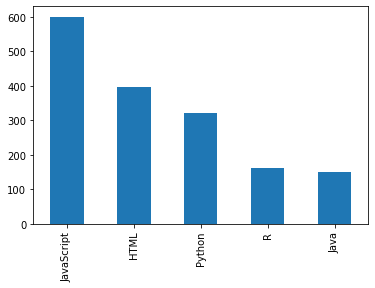

In [9]:
df.language.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='language'>

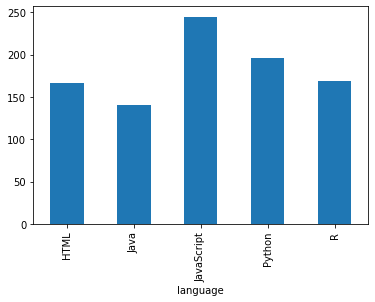

In [10]:
df.total_words.groupby(df.language).mean().plot(kind='bar')

In [11]:
df.total_words.quantile(.66)

171.0

In [12]:
conditions = [(df.total_words > 188),
              (df.total_words >= 77) & (df.total_words <= 188),
              (df.total_words < 77)]
choices = ['high_count', 'med_count', 'low_count']

df['count_bin'] = np.select(conditions, choices)

In [13]:
df_plot = df.groupby(['language', 'count_bin']).size().reset_index().pivot(columns='count_bin', index='language', values=0)

<AxesSubplot:xlabel='language'>

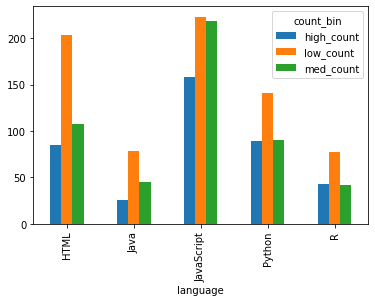

In [14]:
df_plot.plot(kind='bar')

In [15]:
df.language.value_counts()

JavaScript    600
HTML          396
Python        320
R             162
Java          149
Name: language, dtype: int64

In [16]:
JavaScript_freq = pd.Series(JavaScript_words).value_counts()
HTML_freq = pd.Series(HTML_words).value_counts()
Python_freq = pd.Series(Python_words).value_counts()
Java_freq = pd.Series(Java_words).value_counts()
R_freq = pd.Series(R_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [17]:
word_counts = (pd.concat([all_freq, JavaScript_freq, HTML_freq, Python_freq,
                    Java_freq, R_freq], axis=1, sort=True)
                .set_axis(['all', 'JavaScript', 'HTML', 'Python', 'Java','R'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,JavaScript,HTML,Python,Java,R
aa,2,0,1,0,1,0
aaa,1,0,0,0,1,0
aaaa,3,0,0,1,0,2
aac,1,0,0,0,1,0
aachal,2,2,0,0,0,0


In [18]:
word_counts.sort_values(by='all', ascending=False).head(20)

,all,JavaScript,HTML,Python,Java,R
mental,3920,1042,1214,820,276,568
health,3744,926,1170,781,266,601
user,2616,1108,703,489,282,34
project,2361,1265,518,319,135,124
app,2095,1435,223,146,230,61
run,2066,1382,177,274,138,95
file,1955,946,308,453,76,172
data,1883,368,399,531,80,505
use,1704,1066,233,238,83,84
using,1477,666,264,331,127,89


In [19]:
word_counts.sort_values(by='all', ascending=False).head(20)

,all,JavaScript,HTML,Python,Java,R
mental,3920,1042,1214,820,276,568
health,3744,926,1170,781,266,601
user,2616,1108,703,489,282,34
project,2361,1265,518,319,135,124
app,2095,1435,223,146,230,61
run,2066,1382,177,274,138,95
file,1955,946,308,453,76,172
data,1883,368,399,531,80,505
use,1704,1066,233,238,83,84
using,1477,666,264,331,127,89


In [20]:
js_top = word_counts.sort_values(by='JavaScript', ascending=False).head(20)
html_top = word_counts.sort_values(by='HTML', ascending=False).head(20)
python_top = word_counts.sort_values(by='Python', ascending=False).head(20)
java_top = word_counts.sort_values(by='Java', ascending=False).head(20)
r_top = word_counts.sort_values(by='R', ascending=False).head(20)


In [21]:
top_words = (pd.concat([js_top, html_top, python_top, java_top,
                 r_top], axis=0, sort=True)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

top_words.head()

,HTML,Java,JavaScript,Python,R,all
app,223,230,1435,146,61,2095
run,177,138,1382,274,95,2066
build,90,41,1268,54,22,1475
project,518,135,1265,319,124,2361
react,47,24,1209,22,0,1302


In [22]:
top_words= top_words.drop(columns=['all'])

In [23]:
top_words
#, 'PHP', 'C++']

,HTML,Java,JavaScript,Python,R
app,223,230,1435,146,61
run,177,138,1382,274,95
build,90,41,1268,54,22
project,518,135,1265,319,124
react,47,24,1209,22,0
...,...,...,...,...,...
package,68,11,116,66,107
used,268,64,306,257,104
dataset,37,3,7,144,104
employee,48,4,13,34,103


In [24]:
tops = top_words[top_words.index.value_counts() > 2]

/var/folders/qg/y1d1577d6_zdj2rfwsn6lwsh0000gn/T/ipykernel_64552/3058113156.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tops = top_words[top_words.index.value_counts() > 2]


In [25]:
tops.index.unique()

Index(['app', 'run', 'project', 'user', 'use', 'mental', 'file', 'health',
       'create', 'using', 'page', 'code', 'also', 'data', 'help', 'used'],
      dtype='object')

In [26]:
tops.groupby(tops.index).sum()

,HTML,Java,JavaScript,Python,R
also,837,291,1695,459,192
app,669,690,4305,438,183
code,1012,252,2288,1116,508
create,567,204,2460,477,126
data,1596,320,1472,2124,2020
file,1540,380,4730,2265,860
health,5850,1330,4630,3905,3005
help,1047,285,1074,558,123
mental,6070,1380,5210,4100,2840
page,1374,249,1770,186,15


In [27]:
most_freq_155 = word_counts[word_counts['all'] > 155] 
most_freq_155 = most_freq_155[most_freq_155['all'] < 180]
most_freq_180 = word_counts[word_counts['all'] >= 180]
most_freq_180 = most_freq_180[most_freq_180['all'] < 220]
most_freq = word_counts[word_counts['all'] >= 220]

In [28]:
most_freq.head()

,all,JavaScript,HTML,Python,Java,R
able,331,132,93,51,46,9
access,351,154,92,51,23,31
add,683,459,97,74,41,12
adding,224,184,20,7,12,1
also,1158,565,279,153,97,64


In [29]:
word_perc = pd.DataFrame()
for col in most_freq.columns:
    word_perc = word_perc.append(most_freq[col].sort_values(ascending=False)/most_freq[col].sum())

word_perc_155 = pd.DataFrame()
for col in most_freq_155.columns:
    word_perc_155 = word_perc_155.append(most_freq_155[col].sort_values(ascending=False)/most_freq_155[col].sum())
    
word_perc_180 = pd.DataFrame()
for col in most_freq_180.columns:
    word_perc_180 = word_perc_180.append(most_freq_180[col].sort_values(ascending=False)/most_freq_180[col].sum())

In [30]:
word_perc

,mental,health,user,project,app,run,file,data,use,using,...,update,interactive,individual,adding,youre,level,copy,key,better,twitter
all,0.033685,0.032173,0.022480,0.020289,0.018003,0.017754,0.016800,0.016181,0.014643,0.012692,...,0.001942,0.001942,0.001933,0.001925,0.001925,0.001925,0.001916,0.001908,0.001891,0.001891
JavaScript,0.018063,0.016052,0.019207,0.021928,0.024875,0.023956,0.016399,0.006379,0.018479,0.011545,...,0.001976,0.002462,0.001057,0.003190,0.003120,0.001144,0.002687,0.001889,0.001369,0.000277
HTML,0.051456,0.049591,0.029797,0.021956,0.009452,0.007502,0.013055,0.016912,0.009876,0.011190,...,0.001738,0.001568,0.002670,0.000848,0.000721,0.001992,0.001653,0.001950,0.002797,0.001695
Python,0.042268,0.040258,0.025206,0.016443,0.007526,0.014124,0.023351,0.027371,0.012268,0.017062,...,0.002216,0.001289,0.002938,0.000361,0.000619,0.002990,0.001186,0.002062,0.001649,0.007474
Java,0.040012,0.038562,0.040881,0.019571,0.033343,0.020006,0.011018,0.011598,0.012032,0.018411,...,0.002609,0.000290,0.003044,0.001740,0.001740,0.002320,0.000435,0.001740,0.003189,0.000145
R,0.064604,0.068358,0.003867,0.014104,0.006938,0.010805,0.019563,0.057439,0.009554,0.010123,...,0.001137,0.002275,0.002616,0.000114,0.000341,0.004208,0.000341,0.001706,0.002389,0.002047


<AxesSubplot:>

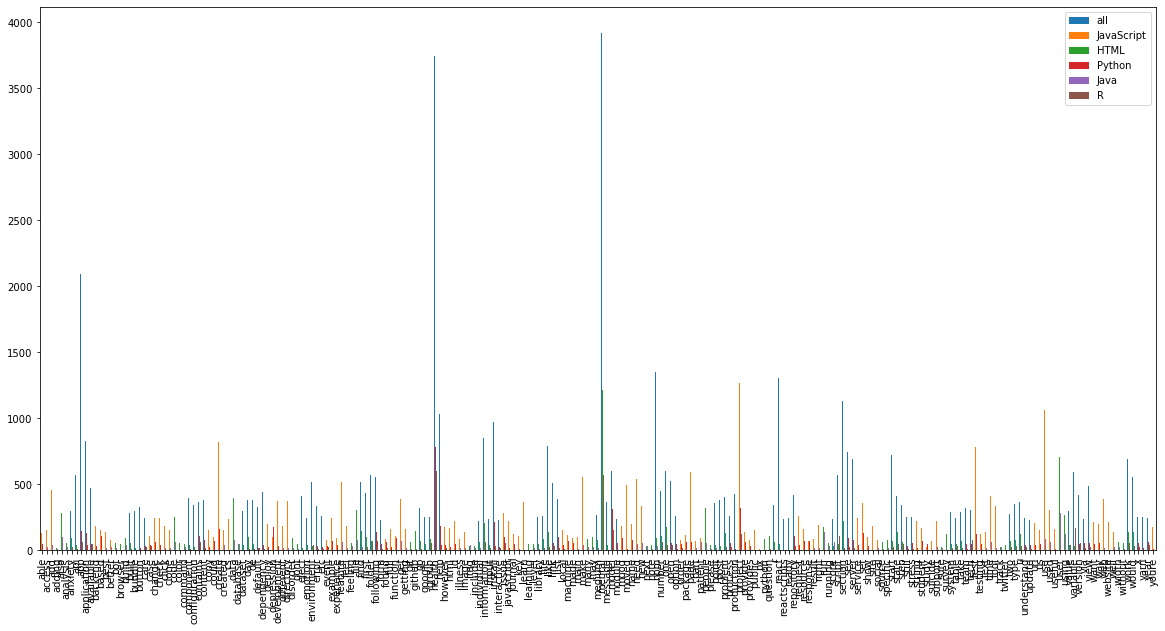

In [31]:
plt.rcParams["figure.figsize"] = (20,10)
most_freq.plot(kind='bar')

<AxesSubplot:>

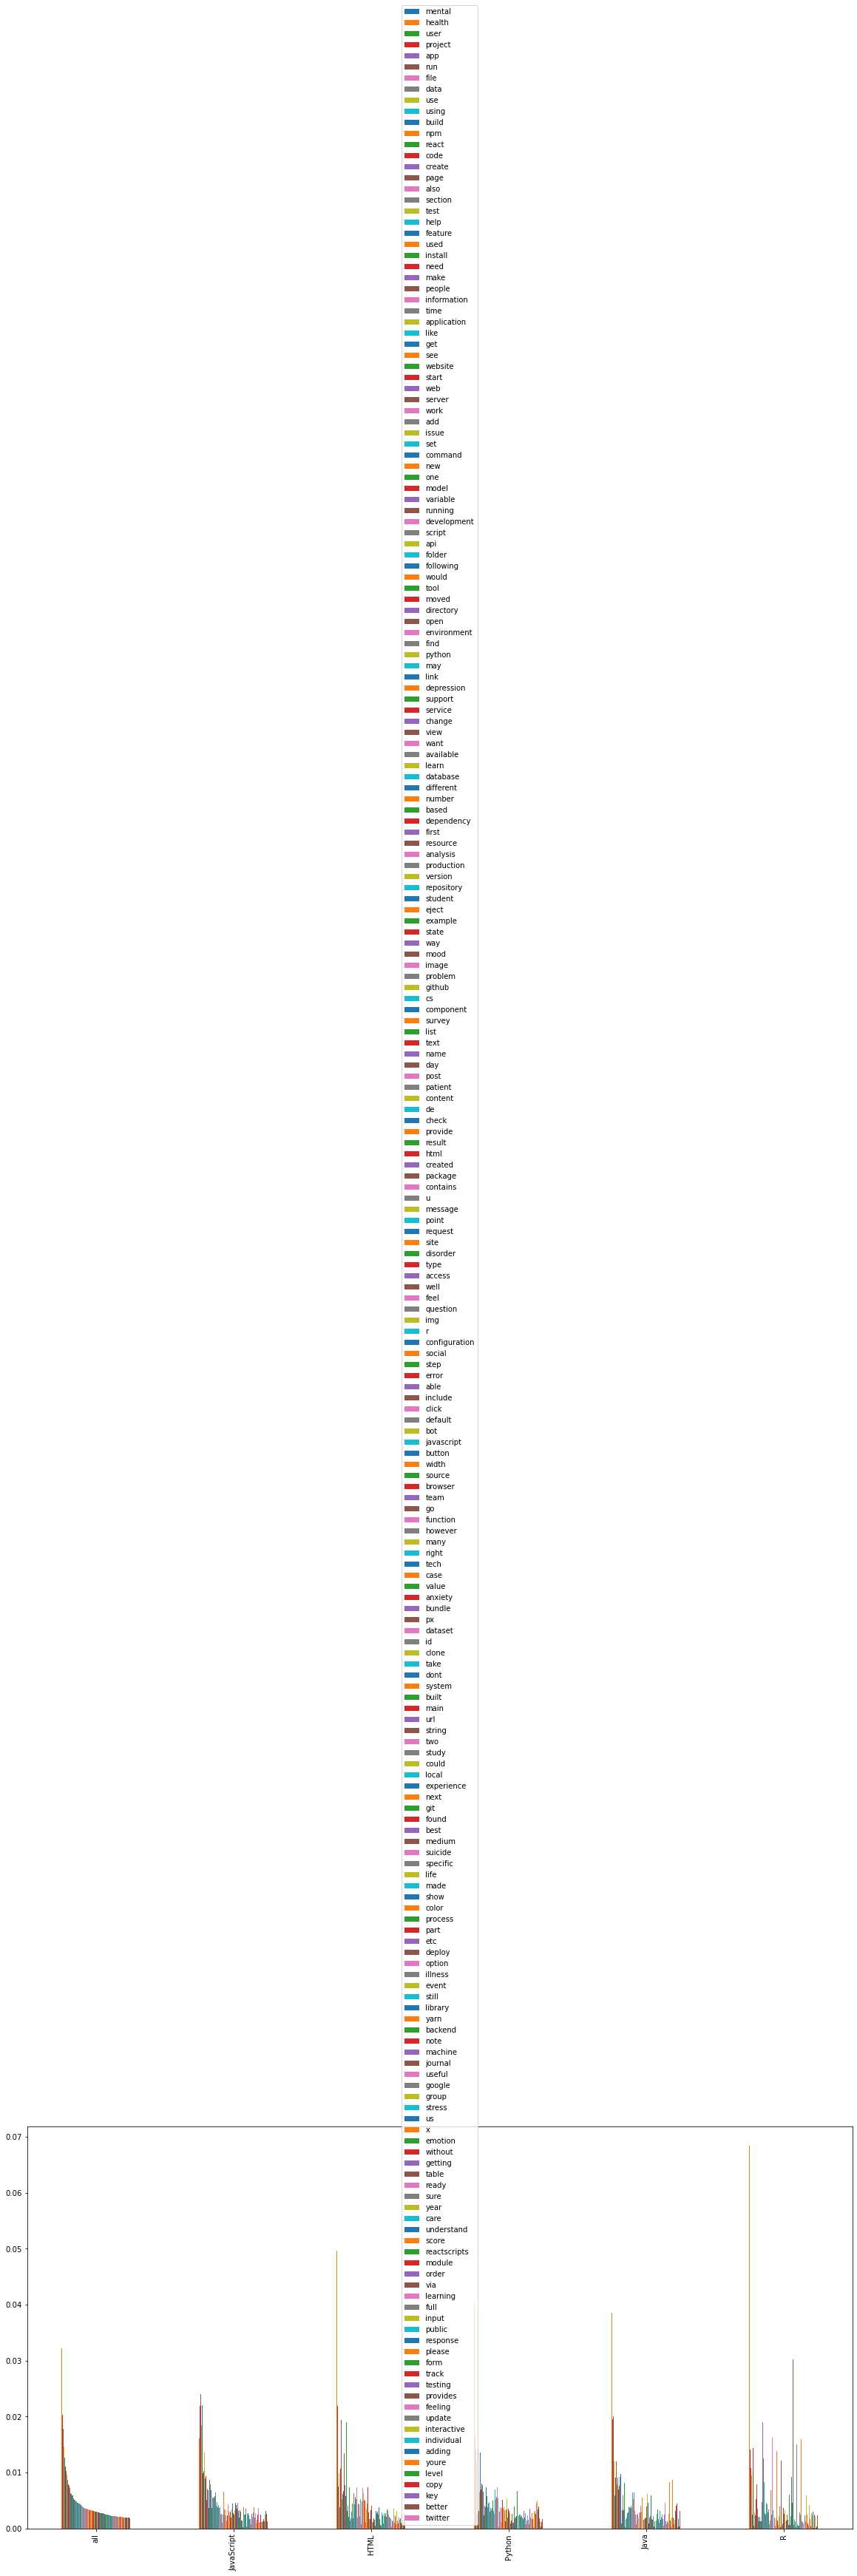

In [32]:
plt.rcParams["figure.figsize"] = (20,10)
word_perc.plot(kind='bar')

In [33]:
word_perc_T = word_perc.T
word_perc_155_T = word_perc_155.T
word_perc_180_T = word_perc_180.T

to look at similarities, we simple look at bars w similar heights. That will show they have a similar distribution of that specific word

<AxesSubplot:>

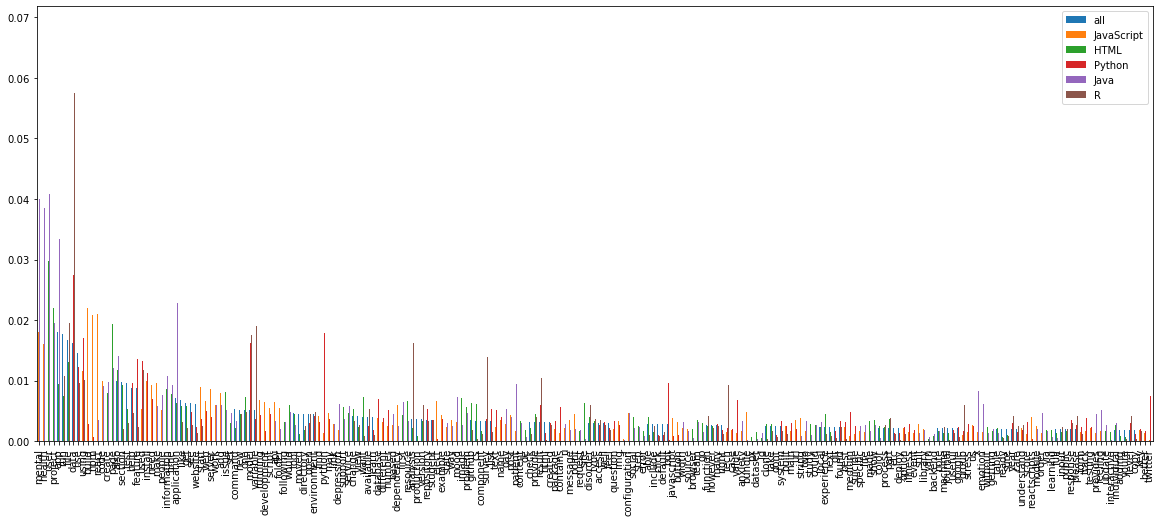

In [34]:
plt.rcParams["figure.figsize"] = (20,8)
word_perc_T.plot(kind='bar')

<AxesSubplot:>

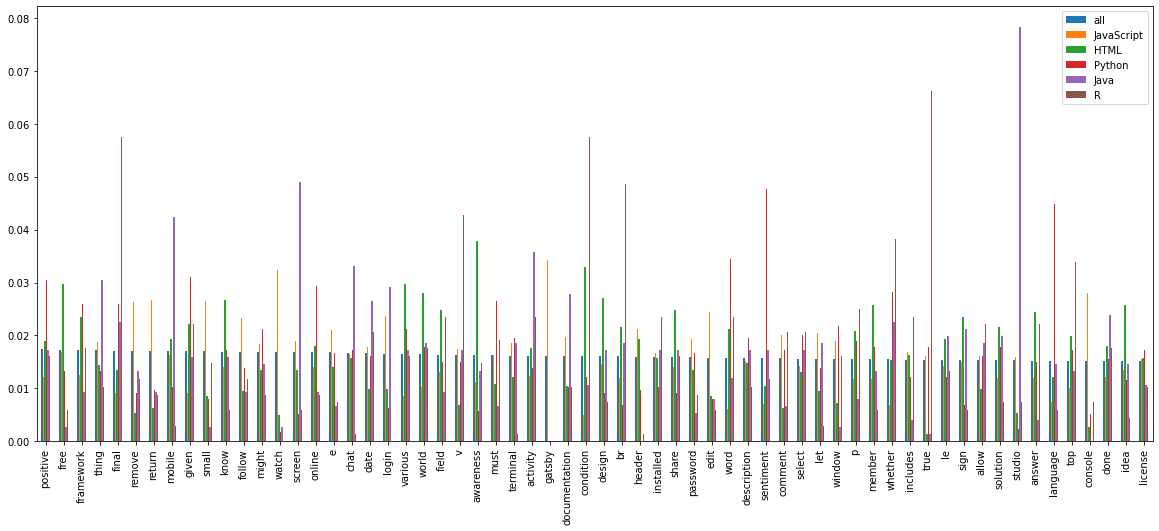

In [35]:
plt.rcParams["figure.figsize"] = (20,8)
word_perc_155_T.plot(kind='bar')

In [36]:
word_perc_T

,all,JavaScript,HTML,Python,Java,R
mental,0.033685,0.018063,0.051456,0.042268,0.040012,0.064604
health,0.032173,0.016052,0.049591,0.040258,0.038562,0.068358
user,0.022480,0.019207,0.029797,0.025206,0.040881,0.003867
project,0.020289,0.021928,0.021956,0.016443,0.019571,0.014104
app,0.018003,0.024875,0.009452,0.007526,0.033343,0.006938
...,...,...,...,...,...,...
level,0.001925,0.001144,0.001992,0.002990,0.002320,0.004208
copy,0.001916,0.002687,0.001653,0.001186,0.000435,0.000341
key,0.001908,0.001889,0.001950,0.002062,0.001740,0.001706
better,0.001891,0.001369,0.002797,0.001649,0.003189,0.002389


<AxesSubplot:>

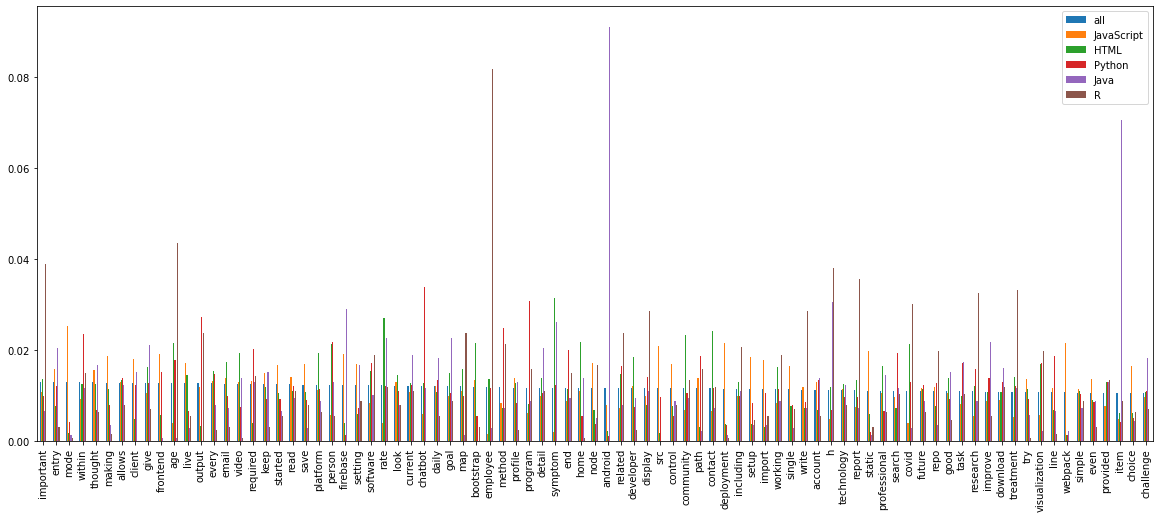

In [37]:
plt.rcParams["figure.figsize"] = (20,8)
word_perc_180_T.plot(kind='bar')

In [38]:
langs = pd.concat([df.language.value_counts(),
                    df.language.value_counts(normalize=True)], axis=1)
langs.columns = ['counts', 'percent']
langs

,counts,percent
JavaScript,600,0.368777
HTML,396,0.243393
Python,320,0.196681
R,162,0.099570
Java,149,0.091580


In [39]:
df

,repo,language,readme_contents,stemmed,lemmatized,total_words,count_bin
0,kharrigian/mental-health-datasets,Python,\n# Mental Health Datasets\n\nThe information ...,mental health datasetsth inform evolv list dat...,mental health datasetsthe information evolving...,2716,high_count
1,behavioral-data/Empathy-Mental-Health,Python,# Empathy in Text-based Mental Health Support\...,empathi textbas mental health supportthi repos...,empathy textbased mental health supportthis re...,400,high_count
2,stutisehgal/RASA-Mental-Health-Chatbot,Python,# RASA-Mental-Health-Chatbot\n\nMental health ...,rasamentalhealthchatbotment health chatbot dev...,rasamentalhealthchatbotmental health chatbot d...,55,low_count
3,openeobs/openeobs,Python,# Open-eObs\n[![Codacy Badge](https://api.coda...,openeobscodaci badgeutmmediumreferralamputmcon...,openeobscodacy badgeutmmediumreferralamputmcon...,223,high_count
4,kharrigian/mental-health-keywords,Python,# Mental Health Keywords for Twitter\n\nThis r...,mental health keyword twitterthi repositori co...,mental health keywords twitterthis repository ...,468,high_count
...,...,...,...,...,...,...,...
2137,Imran-2022/BOOK-ECOMMERCE,JavaScript,##### [BOOK-eCOMMERCE (MERN WEB)](http://local...,bookecommerc mern webhttplocalhost3001 technol...,bookecommerce mern webhttplocalhost3001 techno...,51,low_count
2138,Levodex/RipplerPy,JavaScript,## About\n* \n* (Read github/bitbucket descrip...,read githubbitbucket descript copyright notice...,read githubbitbucket description copyright not...,155,med_count
2139,GVCL/DemographicVis,JavaScript,# DemogrphicVis\nThe interactive visualization...,demogrphicvisth interact visual tool demograph...,demogrphicvisthe interactive visualization too...,110,med_count
2141,Kingbond470/Herbal-Tea-Website,JavaScript,# Herbal-Tea-Website\n\nIt will show the basic...,herbalteawebsiteit show basic info herbal teah...,herbalteawebsiteit show basic info herbal teah...,86,med_count


In [40]:
trigrams = [x for x in df['lemmatized'] for x in trigrams(x.split())]
trigrams

[('mental', 'health', 'datasetsthe'),
 ('health', 'datasetsthe', 'information'),
 ('datasetsthe', 'information', 'evolving'),
 ('information', 'evolving', 'list'),
 ('evolving', 'list', 'data'),
 ('list', 'data', 'set'),
 ('data', 'set', 'primarily'),
 ('set', 'primarily', 'electronicsocial'),
 ('primarily', 'electronicsocial', 'medium'),
 ('electronicsocial', 'medium', 'used'),
 ('medium', 'used', 'model'),
 ('used', 'model', 'mentalhealth'),
 ('model', 'mentalhealth', 'phenomenon'),
 ('mentalhealth', 'phenomenon', 'raw'),
 ('phenomenon', 'raw', 'data'),
 ('raw', 'data', 'additional'),
 ('data', 'additional', 'column'),
 ('additional', 'column', 'found'),
 ('column', 'found', 'datasourcesxlsx'),
 ('found', 'datasourcesxlsx', 'author'),
 ('datasourcesxlsx', 'author', 'paper'),
 ('author', 'paper', 'feel'),
 ('paper', 'feel', 'anything'),
 ('feel', 'anything', 'misrepresented'),
 ('anything', 'misrepresented', 'please'),
 ('misrepresented', 'please', 'hesitate'),
 ('please', 'hesitate',

In [41]:
tri_counts = Counter(trigrams)
print (tri_counts)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [42]:
top = tri_counts.most_common(10)
print (top)

[(('create', 'react', 'app'), 319), (('mental', 'health', 'issue'), 238), (('npm', 'run', 'build'), 193), (('information', 'npm', 'run'), 150), (('project', 'directory', 'run'), 108), (('app', 'development', 'modeopen'), 108), (('development', 'modeopen', 'httplocalhost3000httplocalhost3000'), 105), (('modeopen', 'httplocalhost3000httplocalhost3000', 'view'), 105), (('startruns', 'app', 'development'), 104), (('bootstrapped', 'create', 'react'), 103)]


In [43]:
# df['bigrams'] = all_words.apply(lambda row: list(nltk.ngrams(row, 2)))

In [44]:
# from nltk.util import ngrams

# n = 2
# bigrams = all_words.apply(lambda x:" ".join(x for x in x.split(), n))

In [45]:
df

,repo,language,readme_contents,stemmed,lemmatized,total_words,count_bin
0,kharrigian/mental-health-datasets,Python,\n# Mental Health Datasets\n\nThe information ...,mental health datasetsth inform evolv list dat...,mental health datasetsthe information evolving...,2716,high_count
1,behavioral-data/Empathy-Mental-Health,Python,# Empathy in Text-based Mental Health Support\...,empathi textbas mental health supportthi repos...,empathy textbased mental health supportthis re...,400,high_count
2,stutisehgal/RASA-Mental-Health-Chatbot,Python,# RASA-Mental-Health-Chatbot\n\nMental health ...,rasamentalhealthchatbotment health chatbot dev...,rasamentalhealthchatbotmental health chatbot d...,55,low_count
3,openeobs/openeobs,Python,# Open-eObs\n[![Codacy Badge](https://api.coda...,openeobscodaci badgeutmmediumreferralamputmcon...,openeobscodacy badgeutmmediumreferralamputmcon...,223,high_count
4,kharrigian/mental-health-keywords,Python,# Mental Health Keywords for Twitter\n\nThis r...,mental health keyword twitterthi repositori co...,mental health keywords twitterthis repository ...,468,high_count
...,...,...,...,...,...,...,...
2137,Imran-2022/BOOK-ECOMMERCE,JavaScript,##### [BOOK-eCOMMERCE (MERN WEB)](http://local...,bookecommerc mern webhttplocalhost3001 technol...,bookecommerce mern webhttplocalhost3001 techno...,51,low_count
2138,Levodex/RipplerPy,JavaScript,## About\n* \n* (Read github/bitbucket descrip...,read githubbitbucket descript copyright notice...,read githubbitbucket description copyright not...,155,med_count
2139,GVCL/DemographicVis,JavaScript,# DemogrphicVis\nThe interactive visualization...,demogrphicvisth interact visual tool demograph...,demogrphicvisthe interactive visualization too...,110,med_count
2141,Kingbond470/Herbal-Tea-Website,JavaScript,# Herbal-Tea-Website\n\nIt will show the basic...,herbalteawebsiteit show basic info herbal teah...,herbalteawebsiteit show basic info herbal teah...,86,med_count


In [46]:
top_20_bigrams = (pd.Series(nltk.ngrams(all_words, 2))
                      .value_counts()
                      .head(20))

top_20_bigrams.head(20)

(mental, health)           3158
(section, moved)            527
(npm, run)                  503
(create, react)             405
(react, app)                294
(health, issue)             259
(run, npm)                  238
(run, build)                218
(npm, install)              206
(mental, illness)           205
(environment, variable)     195
(make, sure)                175
(production, build)         160
(social, medium)            156
(information, npm)          152
(would, like)               151
(npm, start)                148
(project, directory)        144
(directory, run)            140
(configuration, file)       138
dtype: int64

## Modeling

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from pprint import pprint

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report
def split_df(df):
    '''
    This function performs split on telco data, stratify churn.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.language)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.language)
    return train, validate, test


In [49]:
train,validate,test = split_df(df)
train.shape,validate.shape, test.shape

((910, 7), (391, 7), (326, 7))

In [51]:
# Setup the X variables
X_train = train.lemmatized
X_validate = validate.lemmatized
X_test = test.lemmatized

In [52]:
# Setup the y variables
y_train = train.language
y_validate = validate.language
y_test = test.language

In [53]:
# Create the tfidf vectorizer object
# encodes these values for classification purposes
tfidf = TfidfVectorizer()

# Fit on the training data
tfidf.fit(X_train)

# Use the object
X_train_vectorized = tfidf.transform(X_train)
X_validate_vectorized = tfidf.transform(X_validate)
X_test_vectorized = tfidf.transform(X_test)

### Logistic Regression  (tfidf vectorizer)

In [54]:
#after vectorizing, we are ready to model
lm = LogisticRegression()

# Fit the classification model to vectorized train data
lm.fit(X_train_vectorized, y_train)

LogisticRegression()

In [55]:
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))

In [56]:
# Use the trained model to predict y given those vectorized inputs of X
train['predicted_lm'] = lm.predict(X_train_vectorized)
validate["predicted_lm"] = lm.predict(X_validate_vectorized)
# test['predicted'] = lm.predict(X_test_vectorized)
print(f'Train Accuracy Score: {lm.score(X_train_vectorized, y_train) * 100:.2f}%')
print(f'Validate Accuracy Score: {lm.score(X_validate_vectorized, y_validate) * 100:.2f}%')


Train Accuracy Score: 91.21%
Validate Accuracy Score: 59.59%


In [57]:
# accuracy matrix
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_lm)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted_lm, train.actual))
print('---')
print(classification_report(train.actual, train.predicted_lm))

Accuracy: 91.21%
---
Confusion Matrix
actual        HTML  Java  JavaScript  Python   R
predicted_lm                                    
HTML           210     7           4       4   3
Java             0    46           0       0   0
JavaScript      10    27         331      10   6
Python           1     3           1     165   3
R                1     0           0       0  78
---
              precision    recall  f1-score   support

        HTML       0.92      0.95      0.93       222
        Java       1.00      0.55      0.71        83
  JavaScript       0.86      0.99      0.92       336
      Python       0.95      0.92      0.94       179
           R       0.99      0.87      0.92        90

    accuracy                           0.91       910
   macro avg       0.94      0.85      0.89       910
weighted avg       0.92      0.91      0.91       910



In [58]:
# accuracy matrix
print('Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_lm)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.predicted_lm, validate.actual))
print('---')
print(classification_report(validate.actual, validate.predicted_lm))

Accuracy: 59.59%
---
Confusion Matrix
actual        HTML  Java  JavaScript  Python   R
predicted_lm                                    
HTML            54    10          20      14   7
Java             0     5           0       0   0
JavaScript      34    18         117      20   7
Python           5     3           7      38   6
R                2     0           0       5  19
---
              precision    recall  f1-score   support

        HTML       0.51      0.57      0.54        95
        Java       1.00      0.14      0.24        36
  JavaScript       0.60      0.81      0.69       144
      Python       0.64      0.49      0.56        77
           R       0.73      0.49      0.58        39

    accuracy                           0.60       391
   macro avg       0.70      0.50      0.52       391
weighted avg       0.64      0.60      0.58       391



### Decision Tree Classifier (tfidf vectorizer)


In [1]:
#decision tree classifier
tree = DecisionTreeClassifier(max_depth=8, random_state=123)
tree.fit(X_train_vectorized, y_train)
# Use the trained model to predict y given those vectorized inputs of X
train['predicted_t'] = tree.predict(X_train_vectorized)
validate["predicted_t"] = tree.predict(X_validate_vectorized)
# test['predicted'] = lm.predict(X_test_vectorized)
print(f'Train Accuracy Score: {tree.score(X_train_vectorized, y_train) * 100:.2f}%')
print(f'Validate Accuracy Score: {tree.score(X_validate_vectorized, y_validate) * 100:.2f}%')


NameError: name 'DecisionTreeClassifier' is not defined

### Logistic Regression Mode ( CountVectorizer)

In [60]:
# Create the cv vectorizer object
# encodes these values for classification purposes
cv = CountVectorizer(ngram_range=(2, 2))

# Fit on the training data
cv.fit(X_train)
# Use the object
X_train_cv = cv.transform(X_train)
X_validate_cv = cv.transform(X_validate)
X_test_cv = cv.transform(X_test)

In [61]:
#after vectorizing, we are ready to model
lm = LogisticRegression()

# Fit the classification model to vectorized train data
lm.fit(X_train_cv, y_train)

LogisticRegression()

In [62]:
# Use the trained model to predict y given those vectorized inputs of X
train['predicted_cv'] = lm.predict(X_train_cv)
validate["predicted_cv"] = lm.predict(X_validate_cv)
# test['predicted'] = lm.predict(X_test_vectorized)
print(f'Train Accuracy Score: {lm.score(X_train_cv, y_train) * 100:.2f}%')
print(f'Validate Accuracy Score: {lm.score(X_validate_cv, y_validate) * 100:.2f}%')


Train Accuracy Score: 99.78%
Validate Accuracy Score: 56.78%


In [63]:
print('Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_cv)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted_cv, train.actual))
print('---')
print(classification_report(train.actual, train.predicted_cv))

Train Accuracy: 99.78%
---
Confusion Matrix
actual        HTML  Java  JavaScript  Python   R
predicted_cv                                    
HTML           220     0           0       0   0
Java             0    83           0       0   0
JavaScript       2     0         336       0   0
Python           0     0           0     179   0
R                0     0           0       0  90
---
              precision    recall  f1-score   support

        HTML       1.00      0.99      1.00       222
        Java       1.00      1.00      1.00        83
  JavaScript       0.99      1.00      1.00       336
      Python       1.00      1.00      1.00       179
           R       1.00      1.00      1.00        90

    accuracy                           1.00       910
   macro avg       1.00      1.00      1.00       910
weighted avg       1.00      1.00      1.00       910



In [64]:
print('Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_cv)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.predicted_cv, validate.actual))
print('---')
print(classification_report(validate.actual, validate.predicted_cv))

Accuracy: 56.78%
---
Confusion Matrix
actual        HTML  Java  JavaScript  Python   R
predicted_cv                                    
HTML            53    13          20      21  17
Java             0    10           0       1   0
JavaScript      34    13         119      26   1
Python           4     0           5      23   4
R                4     0           0       6  17
---
              precision    recall  f1-score   support

        HTML       0.43      0.56      0.48        95
        Java       0.91      0.28      0.43        36
  JavaScript       0.62      0.83      0.71       144
      Python       0.64      0.30      0.41        77
           R       0.63      0.44      0.52        39

    accuracy                           0.57       391
   macro avg       0.64      0.48      0.51       391
weighted avg       0.60      0.57      0.55       391



-----------

### Decision Tree Classifier (CountVectorizer)


In [65]:
#decision tree classifier
tree = DecisionTreeClassifier(max_depth=10, random_state=123)
tree.fit(X_train_cv, y_train)
# Use the trained model to predict y given those vectorized inputs of X
train['predicted_cv_dt'] = tree.predict(X_train_cv)
validate["predicted_cv_dt"] = tree.predict(X_validate_cv)
# test['predicted'] = lm.predict(X_test_vectorized)
print(f'Train Accuracy Score: {tree.score(X_train_cv, y_train) * 100:.2f}%')
print(f'Validate Accuracy Score: {tree.score(X_validate_cv, y_validate) * 100:.2f}%')


Train Accuracy Score: 49.78%
Validate Accuracy Score: 42.71%


In [66]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_cv_dt)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted_cv_dt, train.actual))
print('---')
print(classification_report(train.actual, train.predicted_cv_dt))

Accuracy: 49.78%
---
Confusion Matrix
actual           HTML  Java  JavaScript  Python   R
predicted_cv_dt                                    
HTML               49     0           2       0   0
Java                0    29           0       0   0
JavaScript        173    54         334     148  80
Python              0     0           0      31   0
R                   0     0           0       0  10
---
              precision    recall  f1-score   support

        HTML       0.96      0.22      0.36       222
        Java       1.00      0.35      0.52        83
  JavaScript       0.42      0.99      0.59       336
      Python       1.00      0.17      0.30       179
           R       1.00      0.11      0.20        90

    accuracy                           0.50       910
   macro avg       0.88      0.37      0.39       910
weighted avg       0.78      0.50      0.43       910



In [67]:
from sklearn.metrics import classification_report
print(classification_report(train.actual, train.predicted_lm))

              precision    recall  f1-score   support

        HTML       0.92      0.95      0.93       222
        Java       1.00      0.55      0.71        83
  JavaScript       0.86      0.99      0.92       336
      Python       0.95      0.92      0.94       179
           R       0.99      0.87      0.92        90

    accuracy                           0.91       910
   macro avg       0.94      0.85      0.89       910
weighted avg       0.92      0.91      0.91       910



In [68]:
languages = train.actual.value_counts().index.tolist()


In [69]:
# accuracy prediction for the train
for language in languages:
    language_words = train[train.actual == language]
    accuracy = (language_words.actual == language_words.predicted_lm).mean()
    print(f"Predicting {language} has {round(accuracy, 2)}")

Predicting JavaScript has 0.99
Predicting HTML has 0.95
Predicting Python has 0.92
Predicting R has 0.87
Predicting Java has 0.55


In [70]:
# accuracy prediction for the validate

for language in languages:
    language_words = validate[validate.actual == language]
    accuracy = (language_words.actual == language_words.predicted_lm).mean()
    print(f"Predicting {language} has {round(accuracy, 2)}")

Predicting JavaScript has 0.81
Predicting HTML has 0.57
Predicting Python has 0.49
Predicting R has 0.49
Predicting Java has 0.14
